In [2]:
import os
import os.path as op
import json
import cv2
import base64
import numpy as np
from tqdm import tqdm
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw

from maskrcnn_benchmark.structures.tsv_file_ops import tsv_reader, tsv_writer
from maskrcnn_benchmark.structures.tsv_file_ops import generate_linelist_file
from maskrcnn_benchmark.structures.tsv_file_ops import generate_hw_file
from maskrcnn_benchmark.structures.tsv_file import TSVFile
from maskrcnn_benchmark.data.datasets.utils.image_ops import img_from_base64

In [3]:
orig_root = '../../../../datasets/coco/coco_oscar_preexacted_vvl'
tsv_feature_filename = op.join(orig_root, 'train.feature.tsv')
feat_imgkeys = []
nboxes_all = []
for line in tqdm(tsv_reader(tsv_feature_filename)):
    feat_imgkeys.append(line[0])
    props = json.loads(line[1])
    nboxes_all.append(props['num_boxes'])
    #break

# 113287 it, time: 05:33

113287it [06:50, 275.84it/s]


In [4]:
nboxes_all = np.array(nboxes_all)

/hdd/anaconda3/envs/pt171cu101/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


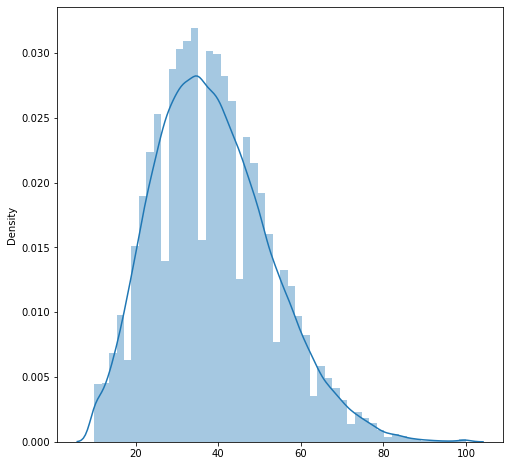

In [5]:
plt.figure(figsize=(8,8))
# plt.hist(nboxes_all, bins=500);
sns.distplot(nboxes_all);

In [6]:
print('Min boxes:', nboxes_all.min())
print('Max boxes:', nboxes_all.max())
print('Mean boxes:', nboxes_all.mean())

Min boxes: 10
Max boxes: 100
Mean boxes: 38.622489782587586


In [16]:
# feat_imgkeys_ar = np.array(feat_imgkeys)
feat_dict = {img_key: nboxes_all[i] for i, img_key in enumerate(feat_imgkeys)}

ids = [318556, 116100, 379340, 134754, 538480]
num_boxes_ids = [feat_dict[str(i)] for i in ids]
num_boxes_ids

[37, 38, 37, 50, 30]

In [8]:
# a[0] = img_key
# a[1] = json string
# = json.loads(a[1])
#j['num_boxes']

In [9]:
tsv_label_filename = op.join(orig_root, 'train.label.tsv')
label_imgkeys = []
label_props = []
for line in tqdm(tsv_reader(tsv_label_filename)):
    label_imgkeys.append(line[0])
    props = json.loads(line[1])
    label_props.append(props)
    #break
# props

113287it [00:06, 17246.18it/s]


In [10]:
for key_f, key_l in tqdm(zip(feat_imgkeys, label_imgkeys)):
    if key_f != key_l:
        print('WOW, SHIT!')


113287it [00:00, 2967543.62it/s]


In [11]:
for img_props in label_props:
    conf = 1.0
    for box in img_props:
        if box['conf'] > conf and box['conf'] < 1:
            print('HOLY SHIT!')
            # print(box)
        else:
            conf = box['conf']

# Class 'Animal' + 'Shellfish' - confs > 1 !!! (1.84, 1.93, 1.14, 1.99)
# В остальном конфиденс скоры строго убывают

In [12]:
print(feat_imgkeys[0], nboxes_all[0])

522418 28


In [13]:
props_len_all = [len(props) for props in label_props]
props_len_all = np.array(props_len_all)

/hdd/anaconda3/envs/pt171cu101/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


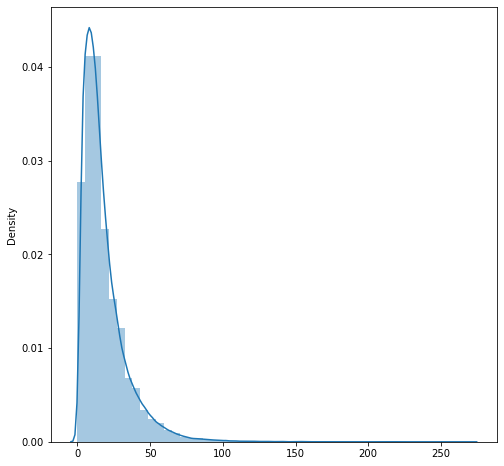

In [16]:
plt.figure(figsize=(8,8))
#plt.hist(props_len_all, bins=500);
sns.distplot(props_len_all);

In [17]:
print('Min objects:', props_len_all.min())
print('Max objects:', props_len_all.max())
print('Mean objects:', props_len_all.mean())

Min objects: 0
Max objects: 270
Mean objects: 18.044859516096288
